In [22]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Machine-learning libraries
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_absolute_percentage_error

# Visualization libraries
import matplotlib.pyplot as plt

## Machine-learning modelling
lundberg.oscar@gmail.com

In this project I have made a brief model.
Due to time constraints I have just made a MWE.
In addition to the MWE, I have tried to outline how I would continue to create a more thorough model.

- 1. Introduction
- 2. Loading and splitting the data
- 3. EDA
- 4. Feature engineering
- 5. Modelling and training
- 6. Evaluation
- 7. Discussion

### 1. Introduction

### 2. Loading and splitting the data
In this section the data is loaded.
The data is also split into three sets training, validation and test.

* Training is done for training of the model
* Validation is for validation and tuning of the hyperparameters in the model
* Testing is done for the final evaluation of the model

In [2]:
filename = os.path.join("data", "MldataCase.csv")
df = pd.read_csv(filename, header=[1])
print(f"Number of rows: {len(df)}")
df.head()

Number of rows: 1000


,fix_Time_mean,fix_Time_sd,progfix_Time_mean,regfix_Time_mean,fix_BXstd_mean,sac_BXdst_sd,sweep_BXdst_mean,sweep_BXdst_sd,fixToWordRatio,pNoiseDur,WCPM
0,311.8690,173.6547,316.1944,285.9167,0.1900,0.8591,9.5850,2.6666,1.1667,0.0118,169.86
1,554.6788,489.7481,597.9429,478.9667,0.1890,0.8824,13.1505,7.9595,2.6613,0.0375,36.17
2,248.1154,214.1027,215.7094,345.3333,0.3949,0.9629,5.3914,4.9921,2.5161,0.2354,72.15
3,333.4583,270.6688,353.9643,261.6875,0.2449,0.8419,8.4383,3.6587,1.9459,0.0679,88.10
4,195.7159,124.9656,202.8906,176.5833,0.3316,1.1677,8.2133,4.1155,1.4915,0.1438,180.47


In [3]:
# Split the data 80%, 10%, 10%
df_train, df_test = train_test_split(df, test_size=0.1)
print(len(df_train), len(df_test))

900 100


### 3. EDA
In order to understand the realtion between features and the output a brief EDA is conducted.
Understanding the various correaltions serves two purposes

1) By understanding the the correaltions between target and variables, we will be able to build a better model.
2) Beside building a better model, the understanding itself might add value.

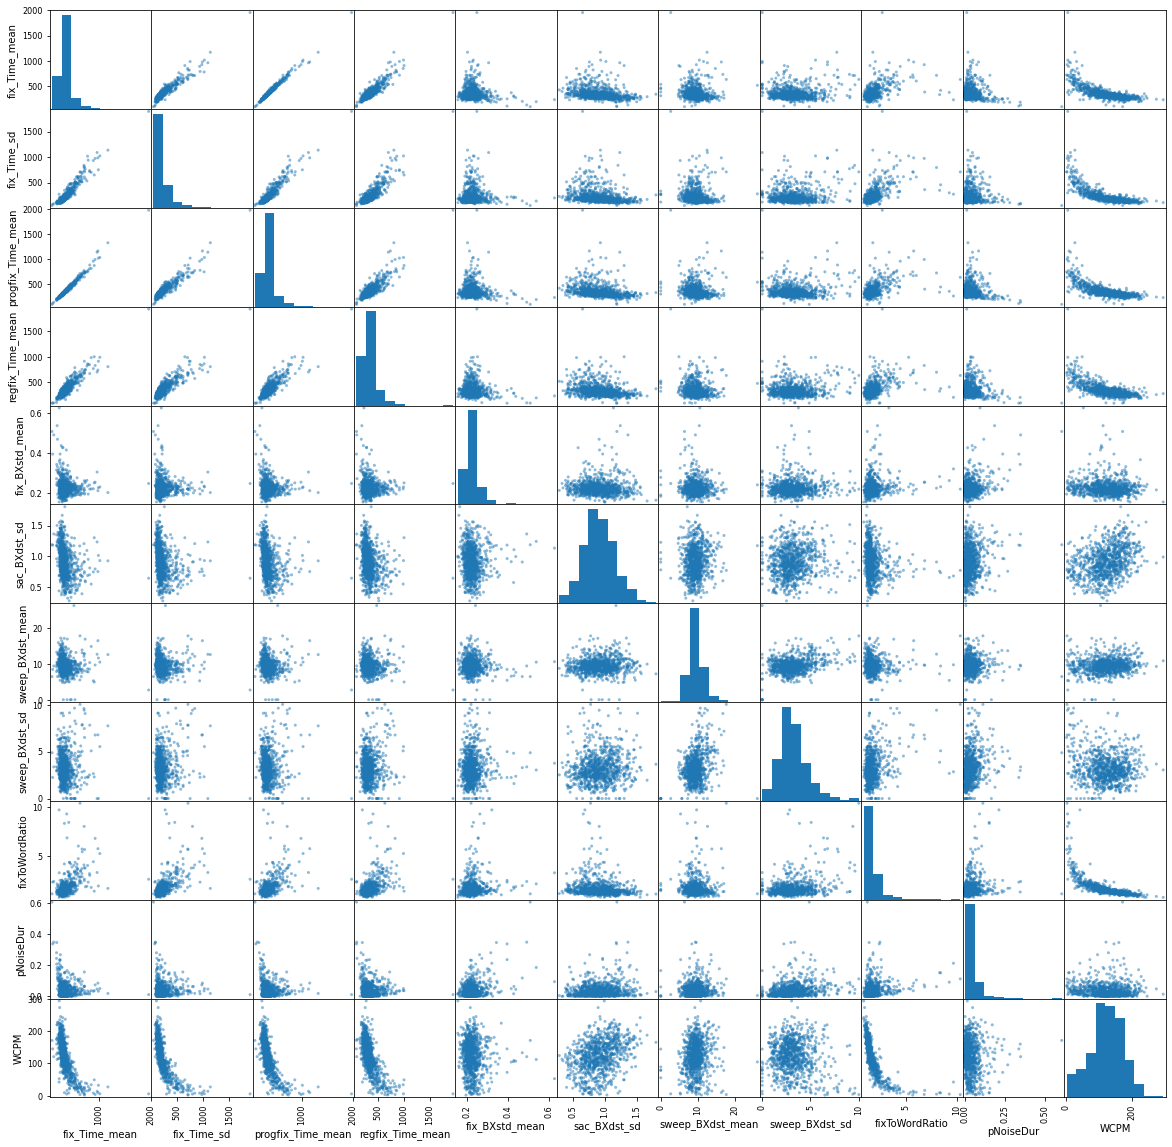

In [4]:
scatter_matrix(df_train, figsize=(20, 20));

#### Observations
We note that some variables seems to be more correlated than other to the target variable (WCPM).

E.g.

- fixToWordRatio
- fix_Time_sd

### 4. Feature engineering
We normalize det data here with a scaler. Using same scaler for train and test.

In [38]:
df_train = df_train.sample(frac=1)
pred_variables = list(df_train.columns)
pred_variables.remove("WCPM")
X_train = df_train[pred_variables]
y_train = df_train[["WCPM"]]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### 5. Modelling (training)
Note how we further split the training data into training and validation.
The validation is used to tune the hyperparameters, and thus we cannot use the testdata for that since we would have data leakage then.

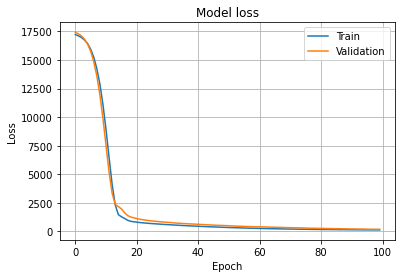

In [44]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1, activation="relu"))
model.compile(loss='mean_squared_error', optimizer="adam")

history = model.fit(X_train, y_train, 
                    epochs=100, batch_size=128, 
                    verbose=0, validation_split=0.1)

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper right') 
plt.grid()
plt.show()

### 6. Evaluation
In this evaluation section we use the test data.
Note how the scaler is the same scaler used for training.

In [45]:
X_test = df_test[pred_variables]
y_test = df_test[["WCPM"]]
X_test = sc.fit_transform(X_test)
y_test_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test_pred, y_test)

0.12538122325479226

### 7. Discussion

Here I present how I would have improved the project if I would have spent more time on this project
- 1. Introduction
    - Write a more thoroughly explained introduction, describe the input data variables, the backround, the purpose etc.
- 2. Loading and splitting the data
    - I think this section is farily complete and perhaps minor improvements would have been done (formatting, reasoning)
- 3. EDA
    - A more thoroughly done EDA should have been done in order to understand the data better. This usually serve two purposes
        a) With increased insight in the data is is easier to build a good model.
        b) The insight from the data itself does many times produce value, since an neural network is a bit like a black box.
- 4. Feature engineering
    - Depending on the EDA, it would have been possible to drop features, perform PCA and other things to have better input data (more signal and less noise) for the modelling part.
- 5. Modelling and training
    - A more thoroughly designed model. Perhaps a grid search in order to find better hyperparameters. Maybe even consider other models instead of a plain feed forward network.
- 6. Evaluation
    - More thorughly evaluation of the final model, in order to have a better understanding on where the model performs better or worse. Maybe the model performance is not uniform across the sample space?
- 7. Discussion
    - Section to wrap things up.